In [2]:
# Basic Python Libraries

# 1. Pandas – library for data analysis and data manipulation
# 2. Matplotlib – library used for data visualization
# 3. Seaborn – a library based on matplotlib and it provides a high-level interface for data visualization
# 4. WordCloud – library to visualize text data
# 5. re – provides functions to pre-process the strings as per the given regular expression


import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
import re

# Natural Language Processing

# 1. nltk – Natural Language Toolkit is a collection of libraries for natural language processing
# 2. stopwords – a collection of words that don’t provide any meaning to a sentence
# 3. WordNetLemmatizer – used to convert different forms of words into a single item but still keeping the context intact.


import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

# Scikit-Learn (Machine Learning Library for Python)

# 1. CountVectorizer – transform text to vectors

# 2. GridSearchCV – for hyperparameter tuning

# 3. RandomForestClassifier – machine learning algorithm for classificationScikit-Learn (Machine Learning Library for Python)

# 1. CountVectorizer – transform text to vectors

# 2. GridSearchCV – for hyperparameter tuning

# 3. RandomForestClassifier – machine learning algorithm for classification

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

# Evaluation Metrics

# 1. Accuracy Score – no. of correctly classified instances/total no. of instances
# 2. Precision Score – the ratio of correctly predicted instances over total positive instances
# 3. Recall Score – the ratio of correctly predicted instances over total instances in that class
# 4. Roc Curve – a plot of true positive rate against false positive rate
# 5. Classification Report – report of precision, recall and f1 score
# 6. Confusion Matrix – a table used to describe the classification models

from sklearn.metrics import accuracy_score,precision_score,recall_score,confusion_matrix,roc_curve,classification_report
from scikitplot.metrics import plot_confusion_matrix



## Evaluate Dataset

We will use the dataset which is available on Kaggle for sentiment analysis, which consists of a sentence and its respective sentiment as a target variable. This dataset contains 3 separate files named train.txt, test.txt and val.txt.

You can find the dataset here.

Now, we will read the training data and validation data. As the data is in text format, separated by semicolons and without column names, we will create the data frame with read_csv() and parameters as “delimiter” and “names”.

In [4]:
import os

path = '../data'
os.chdir(path=path)

df_train = pd.read_csv("train.txt",delimiter=';',names=['text','label'])
df_val = pd.read_csv("val.txt",delimiter=';',names=['text','label'])

Now, we will concatenate these two data frames, as we will be using cross-validation and we have a separate test dataset, so we don’t need a separate validation set of data. And, then we will reset the index to avoid duplicate indexes.

In [5]:
df = pd.concat([df_train,df_val])
df.reset_index(inplace=True,drop=True)

In [9]:
import plotly.express as px
import pandas as pd



# Define custom colors
custom_colors = ['#434247', '#5c5066', '#febc68', '#fcdb8c', '#149589', '#41c0b5']


# Create the count plot using Plotly Express with custom colors
fig = px.histogram(df, x='label', title='Count Plot', color='label',
                   color_discrete_sequence=custom_colors,
                   labels={'label': 'Categories'}, width=600, height=400)

# Show the plot
fig.show()

#### As we can see that, we have 6 labels or targets in the dataset. We can make a multi-class classifier for Sentiment Analysis. But, for the sake of simplicity, we will merge these labels into two classes, i.e. Positive and Negative sentiment.

1. Positive Sentiment – “joy”,”love”,”surprise”

2. Negative Sentiment – “anger”,”sadness”,”fear”

Now, we will create a custom encoder to convert categorical target labels to numerical form, i.e. (0 and 1)

In [12]:
def custom_encoder(df: pd.DataFrame) -> pd.DataFrame:
    """
      
    1. Positive Sentiment – “joy”,”love”,”surprise”
    2. Negative Sentiment – “anger”,”sadness”,”fear”
    
    args: Dataframe of the dataset
    return : Modifed Dataframe
  
    """
    df.replace(to_replace ="surprise", value =1, inplace=True)
    df.replace(to_replace ="love", value =1, inplace=True)
    df.replace(to_replace ="joy", value =1, inplace=True)
    df.replace(to_replace ="fear", value =0, inplace=True)
    df.replace(to_replace ="anger", value =0, inplace=True)
    df.replace(to_replace ="sadness", value =0, inplace=True)

    return df


df = custom_encoder(df)

In [14]:
# Define custom colors
custom_colors = ['#434247', '#5c5066', '#febc68', '#fcdb8c', '#149589', '#41c0b5']


# Create the count plot using Plotly Express with custom colors
fig = px.histogram(df, x='label', title='Count Plot', color='label',
                   color_discrete_sequence=custom_colors,
                   labels={'label': 'Categories'}, width=600, height=400)

# Show the plot
fig.show()

`Now, we can see that our target has changed to 0 and 1,i.e. 0 for Negative and 1 for Positive, and the data is more or less in a balanced state.`

# Data Pre-processing

Now, we will perform some pre-processing on the data before converting it into vectors and passing it to the machine learning model.

We will create a function for pre-processing of data.

1. First, we will iterate through each record, and using a regular expression, we will get rid of any characters apart from alphabets.

2. Then, we will convert the string to lowercase as, the word “Good” is different from the word “good”.

Because, without converting to lowercase, it will cause an issue when we will create vectors of these words, as two different vectors will be created for the same word which we don’t want to.

3. Then we will check for stopwords in the data and get rid of them. Stopwords are commonly used words in a sentence such as “the”, “an”, “to” etc. which do not add much value.

4. Then, we will perform lemmatization on each word,i.e. change the different forms of a word into a single item called a lemma.

A lemma is a base form of a word. For example, “run”, “running” and “runs” are all forms of the same lexeme, where the “run” is the lemma. Hence, we are converting all occurrences of the same lexeme to their respective lemma.

5. And, then return a corpus of processed data.

But first, we will create an object of WordNetLemmatizer and then we will perform the transformation.

In [15]:
#object of WordNetLemmatizer
lm = WordNetLemmatizer()

In [16]:
def text_transformation(df_col : pd.Series ):
    corpus = []
    for item in df_col:
        new_item = re.sub('[^a-zA-Z]',' ',str(item))
        new_item = new_item.lower()
        new_item = new_item.split()
        new_item = [lm.lemmatize(word) for word in new_item if word not in set(stopwords.words('english'))]
        corpus.append(' '.join(str(x) for x in new_item))
    return corpus

In [17]:
corpus = text_transformation(df['text'])

### Now, we will create a Word Cloud. It is a data visualization technique used to depict text in such a way that, the more frequent words appear enlarged as compared to less frequent words. This gives us a little insight into, how the data looks after being processed through all the steps until now.

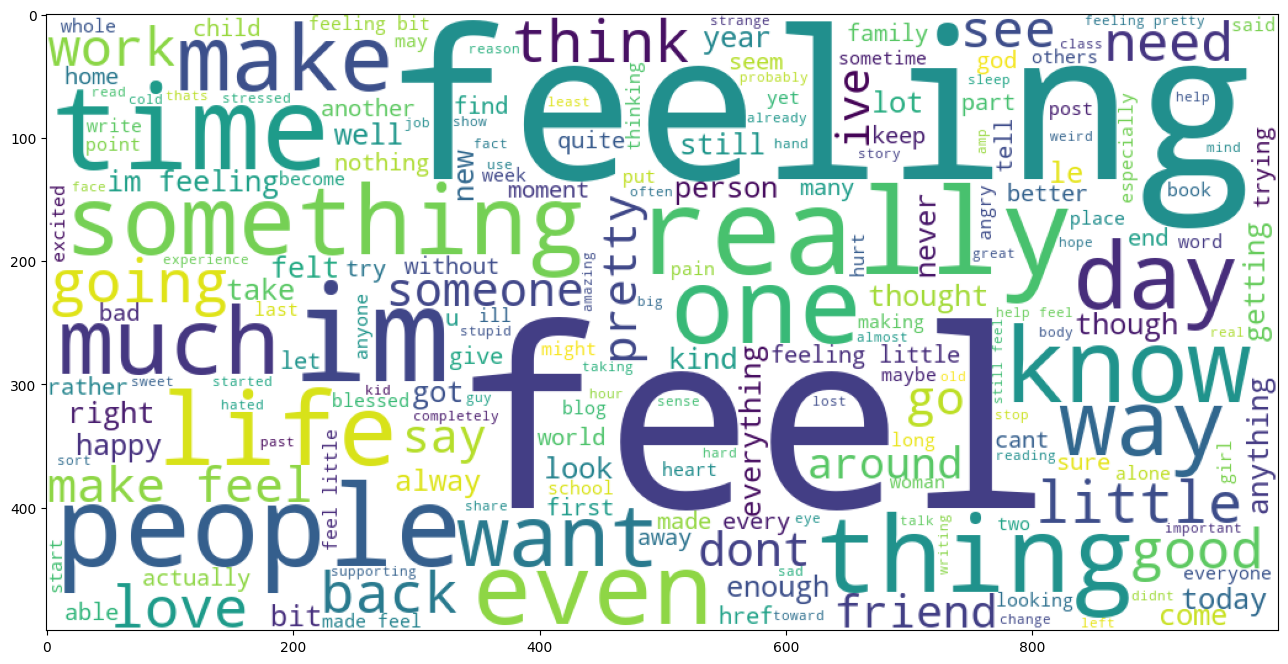

In [18]:
from matplotlib import rcParams


rcParams['figure.figsize'] = 20,8
word_cloud = ""
for row in corpus:
    for word in row:
        word_cloud+=" ".join(word)
wordcloud = WordCloud(width = 1000, height = 500,background_color ='white',min_font_size = 10).generate(word_cloud)
plt.imshow(wordcloud)

## Bag of Words
Now, we will use the Bag of Words Model(BOW), which is used to represent the text in the form of a bag of words,i.e. the grammar and the order of words in a sentence are not given any importance, instead, multiplicity,i.e. (the number of times a word occurs in a document) is the main point of concern.

Basically, it describes the total occurrence of words within a document.

Scikit-Learn provides a neat way of performing the bag of words technique using CountVectorizer.

Now, we will convert the text data into vectors, by fitting and transforming the corpus that we have created.

In [21]:
cv = CountVectorizer(ngram_range=(1,2))
traindata = cv.fit_transform(corpus)
X = traindata
y = df.label

We will take ngram_range as (1,2) which signifies a bigram.

Ngram is a sequence of ‘n’ of words in a row or sentence. ‘ngram_range’ is a parameter, which we use to give importance to the combination of words, such as, “social media” has a different meaning than “social” and “media” separately.

We can experiment with the value of the ngram_range parameter and select the option which gives better results.

Now comes the machine learning model creation part and in this project, I’m going to use Random Forest Classifier, and we will tune the hyperparameters using GridSearchCV.

GridSearchCV() will take the following parameters,

1. Estimator or model – RandomForestClassifier in our case

2. parameters – dictionary of hyperparameter names and their values

3. cv – signifies cross-validation folds

4. return_train_score – returns the training scores of the various models

5. n_jobs – no. of jobs to run parallelly (“-1” signifies that all CPU cores will be used which reduces the training time drastically)

First, We will create a dictionary, “parameters” which will contain the values of different hyperparameters.

We will pass this as a parameter to GridSearchCV to train our random forest classifier model using all possible combinations of these parameters to find the best model.

In [22]:
parameters = {'max_features': ('auto','sqrt'),
             'n_estimators': [500, 1000, 1500],
             'max_depth': [5, 10, None],
             'min_samples_split': [5, 10, 15],
             'min_samples_leaf': [1, 2, 5, 10],
             'bootstrap': [True, False]}

`Now, we will fit the data into the grid search and view the best parameter using the “best_params_” attribute of GridSearchCV.`

In [24]:
grid_search = GridSearchCV(RandomForestClassifier(),parameters,cv=5,return_train_score=True,n_jobs=-1)
grid_search.fit(X,y)
grid_search.best_params_

KeyboardInterrupt: 

`And then, we can view all the models and their respective parameters, mean test score and rank as  GridSearchCV stores all the results in the cv_results_ attribute.`

In [ ]:
for i in range(432):
    print('Parameters: ',grid_search.cv_results_['params'][i])
    print('Mean Test Score: ',grid_search.cv_results_['mean_test_score'][i])
    print('Rank: ',grid_search.cv_results_['rank_test_score'][i])

`Now, we will choose the best parameters obtained from GridSearchCV and create a final random forest classifier model and then train our new model.`

In [ ]:
rfc = RandomForestClassifier(max_features=grid_search.best_params_['max_features'],
                                      max_depth=grid_search.best_params_['max_depth'],
                                      n_estimators=grid_search.best_params_['n_estimators'],
                                      min_samples_split=grid_search.best_params_['min_samples_split'],
                                      min_samples_leaf=grid_search.best_params_['min_samples_leaf'],
                                      bootstrap=grid_search.best_params_['bootstrap'])
rfc.fit(X,y)

# Test Data Transformation
Now, we will read the test data and perform the same transformations we did on training data and finally evaluate the model on its predictions.

In [ ]:
test_df = pd.read_csv('test.txt',delimiter=';',names=['text','label'])

In [ ]:
X_test,y_test = test_df.text,test_df.label
#encode the labels into two classes , 0 and 1
test_df = custom_encoder(y_test)
#pre-processing of text
test_corpus = text_transformation(X_test)
#convert text data into vectors
testdata = cv.transform(test_corpus)
#predict the target
predictions = rfc.predict(testdata)

# Model Evaluation
We will evaluate our model using various metrics such as Accuracy Score, Precision Score, Recall Score, Confusion Matrix and create a roc curve to visualize how our model performed.

In [ ]:
rcParams['figure.figsize'] = 10,5
plot_confusion_matrix(y_test,predictions)
acc_score = accuracy_score(y_test,predictions)
pre_score = precision_score(y_test,predictions)
rec_score = recall_score(y_test,predictions)
print('Accuracy_score: ',acc_score)
print('Precision_score: ',pre_score)
print('Recall_score: ',rec_score)
print("-"*50)
cr = classification_report(y_test,predictions)
print(cr)

# Roc Curve:

We will find the probability of the class using the predict_proba() method of Random Forest Classifier and then we will plot the roc curve.

In [ ]:
predictions_probability = rfc.predict_proba(testdata)
fpr,tpr,thresholds = roc_curve(y_test,predictions_probability[:,1])
plt.plot(fpr,tpr)
plt.plot([0,1])
plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

As we can see that our model performed very well in classifying the sentiments, with an Accuracy score, Precision and  Recall of approx 96%. And the roc curve and confusion matrix are great as well which means that our model is able to classify the labels accurately, with fewer chances of error.

Now, we will check for custom input as well and let our model identify the sentiment of the input statement.

Predict for Custom Input:

In [ ]:
def expression_check(prediction_input):
    if prediction_input == 0:
        print("Input statement has Negative Sentiment.")
    elif prediction_input == 1:
        print("Input statement has Positive Sentiment.")
    else:
        print("Invalid Statement.")

In [ ]:
# function to take the input statement and perform the same transformations we did earlier
def sentiment_predictor(input):
    input = text_transformation(input)
    transformed_input = cv.transform(input)
    prediction = rfc.predict(transformed_input)
    expression_check(prediction)